# importing libraries

In [1]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as pltimport seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from  matplotlib import pyplot 

# working directory

In [2]:
os.chdir("E:\ml\Project1")

# loading dataset

In [3]:
df = pd.read_csv("day.csv")

# High Level Analysis

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df.describe(include=['O'])

,dteday
count,731
unique,731
top,2012-12-15
freq,1


# Null Check

In [9]:
na_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
print(na_percentage)
#no null values 

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64


# exploratory data analysis

In [10]:
df['season']= df['season'].astype('category')
df['yr']=df['yr'].astype('int')
df['mnth']=df['mnth'].astype('category')
df['holiday']=df['holiday'].astype('int')
df['workingday']=df['workingday'].astype('int')
df['weekday']=df['weekday'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
d1=df['dteday'].copy()
#makes a shallow copy of df['dteday']
for i in range (0,d1.shape[0]):
    #up till 731 
    d1[i]=datetime.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
df['dteday']=d1
df['dteday']=df['dteday'].astype('category')
df = df.drop(['instant','casual', 'registered'], axis=1)

In [11]:
df.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

# Missing value analysis

In [12]:
missing_val = pd.DataFrame()

In [13]:
missing_val

""


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x295cd318828>,
 'caps': [<matplotlib.lines.Line2D at 0x295cd318eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x295cd318400>],
 'medians': [<matplotlib.lines.Line2D at 0x295cd32d588>],
 'fliers': [<matplotlib.lines.Line2D at 0x295cd32d8d0>],
 'means': []}

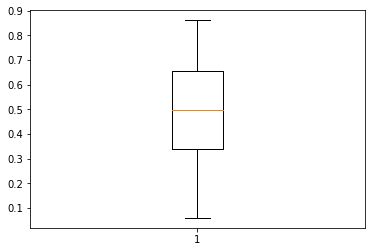

In [14]:
#saving numeric values
cnames=["temp","atemp","hum","windspeed",]
#ploting boxplotto visualize outliers#
plt.boxplot(df['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x295cd5e9da0>,
 'caps': [<matplotlib.lines.Line2D at 0x295cd5f4748>,
 'boxes': [<matplotlib.lines.Line2D at 0x295cd5e9c50>],
 'medians': [<matplotlib.lines.Line2D at 0x295cd5f4dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x295cd5f4eb8>],
 'means': []}

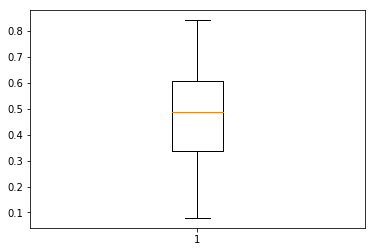

In [15]:
plt.boxplot(df['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x295cd6584a8>,
 'caps': [<matplotlib.lines.Line2D at 0x295cd658b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x295cd658080>],
 'medians': [<matplotlib.lines.Line2D at 0x295cd658f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x295cd660550>],
 'means': []}

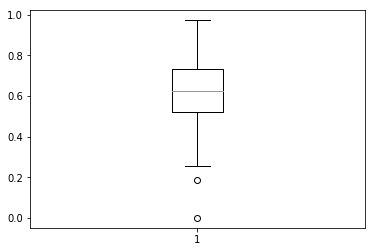

In [16]:
plt.boxplot(df['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x295cd6afd68>,
 'caps': [<matplotlib.lines.Line2D at 0x295cd6b9438>,
 'boxes': [<matplotlib.lines.Line2D at 0x295cd6af940>],
 'medians': [<matplotlib.lines.Line2D at 0x295cd6b9ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x295cd6b9e10>],
 'means': []}

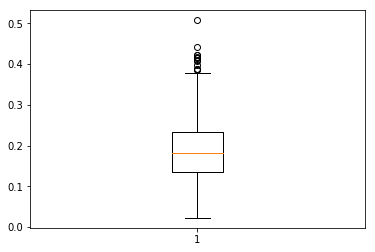

In [17]:
plt.boxplot(df['windspeed'])

# Feature Selection

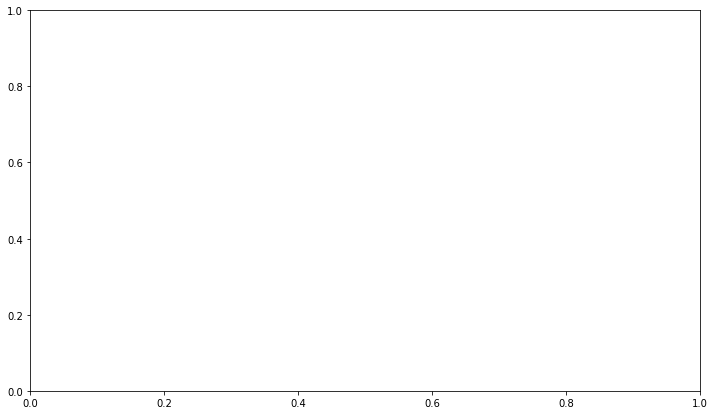

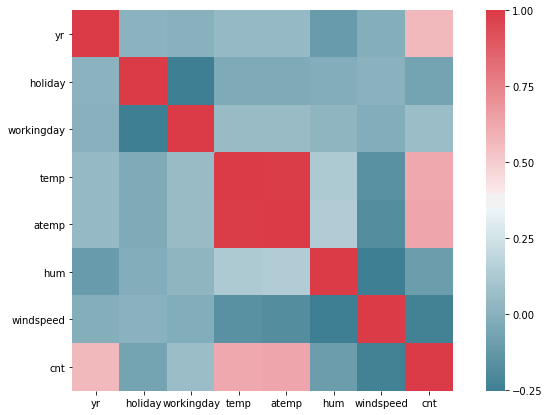

In [19]:
df_corr = df
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [20]:
corr['cnt'].sort_values()
#we need to drop correlated variables temp and atemp 

windspeed    -0.234545
hum          -0.100659
holiday      -0.068348
workingday    0.061156
yr            0.566710
temp          0.627494
atemp         0.631066
cnt           1.000000
Name: cnt, dtype: float64

# droping corelated variable

In [21]:
df = df.drop(['atemp'], axis=1)

# Separate X and Y

In [22]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# Modeling 

In [23]:
#dividing data into train and test
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

# Scaling

In [24]:
df.describe()
sc = StandardScaler()
scaler = sc.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Baseline model

In [25]:
#random forest
model = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)
# Predictions = model.predict(test.iloc[:,0:11])
model.score(X_test,y_test)

0.8938116979925917

# Hyperparamter Tuning

In [26]:
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
rf_random.fit(X_train, y_train)
model = rf_random.best_estimator_
print(rf_random.best_params_)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(y_test[:11])
print(model.predict(X_test[:11]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 133, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
0.8855424302031644
184    6043
535    6825
299    2659
221    4780
152    4968
404    3830
198    4458
171    4835
512    6591
200    4332
509    6770
Name: cnt, dtype: int64
[4689.6568609  6857.94500537 3899.65601504 4909.54151937 4724.60415512
 3544.1688507  4508.60168466 4104.99319131 6346.54837093 4608.24834894
 6705.80764411]


In [27]:
model.score(X_test,y_test)

0.8855424302031644